Цель: изучить применение методов оптимизации для решения задачи классификации
Описание задания:
В домашнем задании необходимо применить полученные знания в теории оптимизации и машинном обучении для реализации логистической регрессии.  
Этапы работы:**
1. Загрузите данные.   
Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.  
2. Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. *Оформите в виде класса с методами.
3. Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.
4. Повторите п. 3 для метода скользящего среднего (Root Mean Square Propagation, RMSProp).
5. Повторите п. 3 для ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam).
6. Сравните значение метрик для реализованных методов оптимизации. Можно оформить в виде таблицы вида |метод|метрика|время работы| (время работы опционально).  
Напишите вывод.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.lines import lineStyles
from matplotlib import markers
import pandas as pd
import numpy as np


In [ ]:
# считываем данные и создаем датасет с добавлением колонок class и target
data = load_iris()
df = pd.DataFrame (data=data.data, columns=data.feature_names)
df['target']=data.target
df['class']=data.target_names[data.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
# оставляем нужные классы
df_class = df[df['class'].isin (['versicolor', 'virginica'])]
df_class.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [ ]:
# определяем признаки и ключевую переменную
Y = df_class['target']
X = df_class.drop(columns=['class','target'])


In [ ]:
# создадим класс логистической регресии

class LogRes:

  def __init__ (self, rate, iteracia):
    # загрузка параметров модели
    self.rate = rate
    self.iteracia = iteracia
    self.bais = None
    self.wesa = None

  # создаем функцию сигмоиды
  def sigma (self, z):
    return 1 / ( 1 + np.exp(-z))

  # реализуем функцию потерь
  def cost_log (self, X, Y):
    m = len (Y)
    # предсказанная вероятность принадлежности к класу
    P = self.sigma (np.dot (X, self.wesa) + self.bais)
    # логарифмическая функция потери
    cost = ( -1/m ) * np.sum (Y * np.log(P) + (1 - Y) * np.log( 1 - P))
    return cost

  # реализуем функцию прогнозирования
  def predict (self, X):
    # расчитываем вероятность принадлежности
    P = self.sigma (np.dot (X, self.wesa) + self.bais)
    predict = ( P >= 0.5).astype(int)
    return predict

  # функция обучения с градиентным спуском
  def fit (self, X, Y):
    m = len (Y)
    self.wesa = np.zeros (X.shape[1])
    self.bais = 0
    # цикл выполнения итераций с условием для каждой итерации
    for iter in range (self.iteracia):
      # создание линейной модели для сигмоиды
      z = np.dot (X, self.wesa) + self.bais
      P = self.sigma (z)
      # вычисление производных градиента для весов и сдвигов
      grad_wes = ( 1/m ) * np.dot (X.T, ( P-Y ))
      grad_sdv = ( 1/m ) * np.sum ( P-Y )
      # обновление весов и сдвигов
      self.wesa -= self.rate * grad_wes
      self.bais -= self.rate * grad_sdv

  # функция оценки точности
  def score (self, X, Y):
    y_pred = self.predict(X)
    correct = np.sum( y_pred == Y )
    return correct/len(Y)



Разделим данные на обучающие и тестовые и проверим точность прогнозов.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LogRes(rate=0.01, iteracia=1000)
model.fit(X_train, y_train)


In [ ]:
model.score(X_train, y_train)

np.float64(0.475)

In [ ]:
model.score(X_test, y_test)

np.float64(0.6)

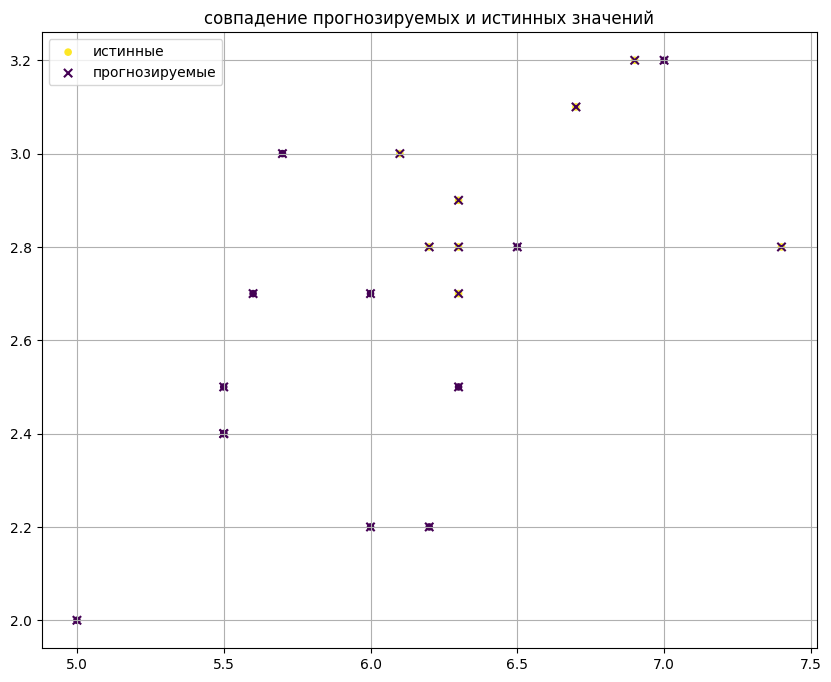

In [ ]:


plt.figure(figsize=(10, 8))
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test, marker='o', label='истинные', s=20)
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=model.predict(X_test), marker='x', label='прогнозируемые')
plt.title('совпадение прогнозируемых и истинных значений')
plt.legend()
plt.grid(True)
plt.show()